In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle

import imblearn
from imblearn.over_sampling import ADASYN

from sklearn.model_selection import StratifiedKFold

import time 

start_time = time.time()


Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

from sklearn.utils import shuffle
df= shuffle(df)

In [3]:
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
#Separation of data into training & test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#print("Number transactions X_train dataset: ", X_train.shape)
#print("Number transactions y_train dataset: ", y_train.shape)
#print("Number transactions X_test dataset: ", X_test.shape)
#print("Number transactions y_test dataset: ", y_test.shape)

Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426454, 30)
After OverSampling, the shape of train_y: (426454,) 

After OverSampling, counts of label '1': 213218
After OverSampling, counts of label '0': 213236
Train on 213605 samples, validate on 71202 samples
Epoch 1/150
213605/213605 [==============================] - 21s 98us/step - loss: 0.0016 - val_loss: 2.9880e-04
Epoch 2/150
213605/213605 [==============================] - 20s 94us/step - loss: 2.2548e-04 - val_loss: 1.8088e-04
Epoch 3/150
213605/213605 [==============================] - 20s 92us/step - loss: 1.4463e-04 - val_loss: 1.3836e-04
Epoch 4/150
213605/213605 [==============================] - 20s 92us/step - loss: 1.2267e-04 - val_loss: 1.3204e-04
Epoch 5/150
213605/213605 [==============================] - 20s 92us/step - loss: 1.1835e-04 - val_loss: 1.2106e-04
Epoch 6/150
213605/213605 [==============================] - 20s 93us/step - loss: 1.0949e-04 - val_loss: 1.3259e-04
Epoch 7/150
213605/213605 [===================

213605/213605 [==============================] - 20s 96us/step - loss: 3.6073e-05 - val_loss: 3.8555e-05
Epoch 74/150
213605/213605 [==============================] - 20s 94us/step - loss: 3.5961e-05 - val_loss: 3.5043e-05
Epoch 75/150
213605/213605 [==============================] - 20s 95us/step - loss: 3.5822e-05 - val_loss: 3.5351e-05
Epoch 76/150
213605/213605 [==============================] - 20s 95us/step - loss: 3.5601e-05 - val_loss: 4.1332e-05
Epoch 77/150
213605/213605 [==============================] - 20s 92us/step - loss: 3.5653e-05 - val_loss: 3.5454e-05
Epoch 78/150
213605/213605 [==============================] - 20s 92us/step - loss: 3.5650e-05 - val_loss: 8.3999e-05
Epoch 79/150
213605/213605 [==============================] - 19s 91us/step - loss: 3.5527e-05 - val_loss: 4.6553e-05
Epoch 80/150
213605/213605 [==============================] - 19s 91us/step - loss: 3.5371e-05 - val_loss: 3.3952e-05
Epoch 81/150
213605/213605 [==============================] - 20s 94u

213605/213605 [==============================] - 46s 214us/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 10/50
213605/213605 [==============================] - 46s 215us/step - loss: 0.0050 - accuracy: 0.9991 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 11/50
213605/213605 [==============================] - 46s 217us/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 12/50
213605/213605 [==============================] - 46s 216us/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 13/50
213605/213605 [==============================] - 46s 216us/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 14/50
213605/213605 [==============================] - 46s 215us/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 15/50
213605/213605 [==============================] - 46s 215us/step - loss: 0.0045 - accurac

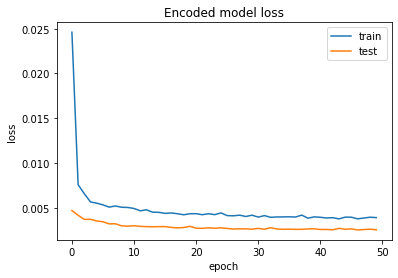

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994101289289626


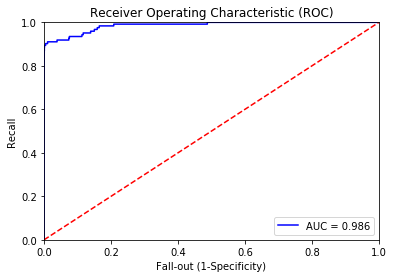

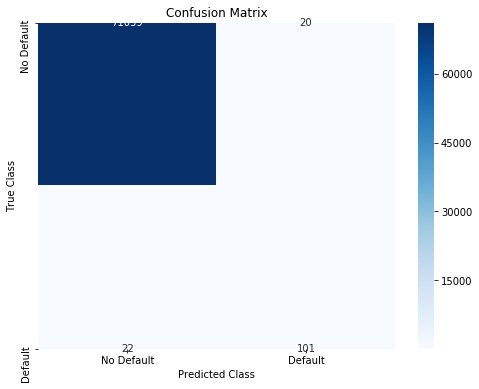

AUC(ROC): 0.9104284171613928
Precision: 0.8347107438016529
Recall: 0.8211382113821138
F1 score: 0.8278688524590164
False positives: 20
True positives: 101
False negatives: 22
True negatives: 71059
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426522, 30)
After OverSampling, the shape of train_y: (426522,) 

After OverSampling, counts of label '1': 213286
After OverSampling, counts of label '0': 213236
Train on 213605 samples, validate on 71202 samples
Epoch 1/150
213605/213605 [==============================] - 22s 103us/step - loss: 0.0015 - val_loss: 3.1388e-04
Epoch 2/150
213605/213605 [==============================] - 21s 99us/step - loss: 2.1818e-04 - val_loss: 1.7494e-04
Epoch 3/150
213605/213605 [==============================] - 21s 97us/step - loss: 1.5275e-04 - val_loss: 1.5027e-04
Epoch 4/150
213605/213605 [==============================] - 21s 98us/step - loss: 1.2788e-04 - val_loss: 1.2089e-04
Epoch 5/150
213605/213605 [==============================] - 20s 95us/step - loss: 1.1829e-04 - val_loss: 1.1597e-04
Epoch 6/150
213605/213605 [==============================] - 20s 95us/step - loss: 1.1028e-04 - val_loss: 1.0913e-04
Epoch 7/150
213605/213605 [==================

213605/213605 [==============================] - 20s 93us/step - loss: 3.7851e-05 - val_loss: 3.5416e-05
Epoch 99/150
213605/213605 [==============================] - 20s 91us/step - loss: 3.7334e-05 - val_loss: 3.6987e-05
Epoch 101/150
213605/213605 [==============================] - 20s 95us/step - loss: 3.7339e-05 - val_loss: 3.8473e-05
Epoch 104/150
213605/213605 [==============================] - 20s 95us/step - loss: 3.7497e-05 - val_loss: 3.3651e-05
Epoch 105/150
213605/213605 [==============================] - 20s 94us/step - loss: 3.6652e-05 - val_loss: 3.4487e-05
Epoch 109/150
213605/213605 [==============================] - 20s 95us/step - loss: 3.6046e-05 - val_loss: 3.5774e-05
Epoch 110/150
213605/213605 [==============================] - 20s 96us/step - loss: 3.5826e-05 - val_loss: 3.3626e-05
Epoch 114/150
213605/213605 [==============================] - 21s 98us/step - loss: 3.5971e-05 - val_loss: 3.6111e-05
Epoch 115/150
213605/213605 [==============================] - 

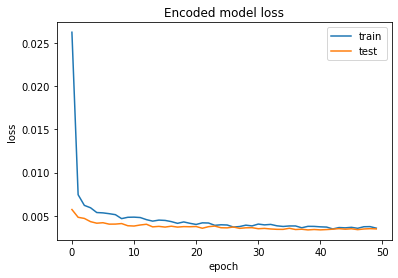

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993679952810315


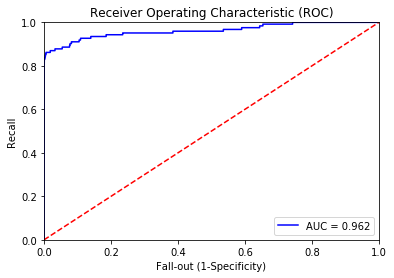

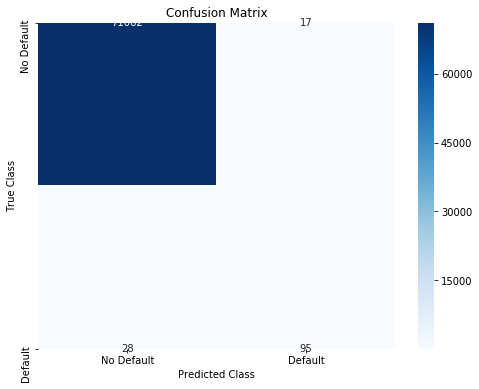

AUC(ROC): 0.8860592765384034
Precision: 0.8482142857142857
Recall: 0.7723577235772358
F1 score: 0.8085106382978723
False positives: 17
True positives: 95
False negatives: 28
True negatives: 71062
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426509, 30)
After OverSampling, the shape of train_y: (426509,) 

After OverSampling, counts of label '1': 213273
After OverSampling, counts of label '0': 213236
Train on 213605 samples, validate on 71202 samples
Epoch 1/150
213605/213605 [==============================] - 21s 99us/step - loss: 0.0016 - val_loss: 3.1755e-04
Epoch 2/150
213605/213605 [==============================] - 21s 97us/step - loss: 2.3882e-04 - val_loss: 1.8914e-04
Epoch 3/150
213605/213605 [==============================] - 21s 96us/step - loss: 1.4264e-04 - val_loss: 1.2962e-04
Epoch 4/150
213605/213605 [==============================] - 21s 96us/step - loss: 1.2373e-04 - val_loss: 1.2408e-04
Epoch 5/150
213605/213605 [==============================] - 21s 97us/step - loss: 1.1899e-04 - val_loss: 1.2164e-04
Epoch 6/150
213605/213605 [==============================] - 21s 97us/step - loss: 1.1369e-04 - val_loss: 1.1047e-04
Epoch 7/150
213605/213605 [===================

213605/213605 [==============================] - 20s 92us/step - loss: 3.6751e-05 - val_loss: 3.7813e-05
Epoch 97/150
213605/213605 [==============================] - 20s 92us/step - loss: 3.6219e-05 - val_loss: 3.7408e-05
Epoch 98/150
213605/213605 [==============================] - 19s 91us/step - loss: 3.6238e-05 - val_loss: 4.3620e-05
Epoch 103/150
213605/213605 [==============================] - 20s 94us/step - loss: 3.5978e-05 - val_loss: 3.5529e-05
Epoch 105/150
213605/213605 [==============================] - 20s 95us/step - loss: 3.5749e-05 - val_loss: 3.9576e-05
Epoch 106/150
213605/213605 [==============================] - 22s 105us/step - loss: 3.5629e-05 - val_loss: 3.5161e-05
Epoch 107/150
213605/213605 [==============================] - 21s 96us/step - loss: 3.5670e-05 - val_loss: 3.9055e-05
Epoch 108/150
213605/213605 [==============================] - 21s 96us/step - loss: 3.5722e-05 - val_loss: 4.4435e-05
Epoch 109/150
213605/213605 [==============================] - 

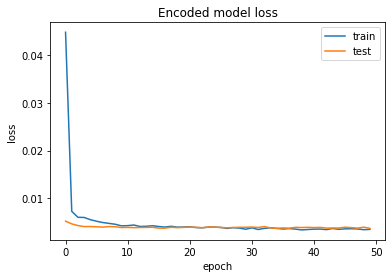

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993679952810315


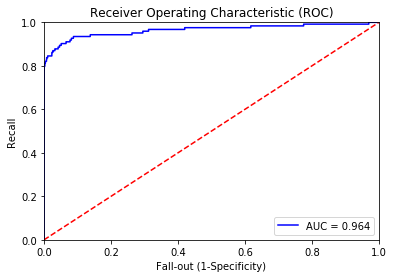

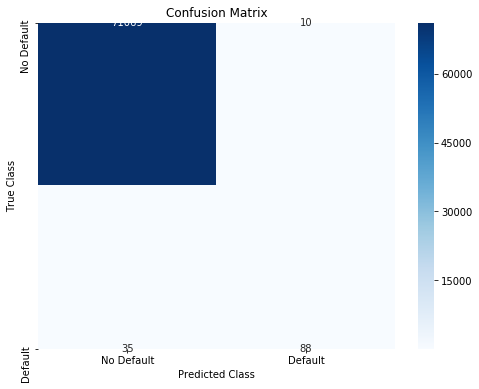

AUC(ROC): 0.8576532329709402
Precision: 0.8979591836734694
Recall: 0.7154471544715447
F1 score: 0.7963800904977375
False positives: 10
True positives: 88
False negatives: 35
True negatives: 71069
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426486, 30)
After OverSampling, the shape of train_y: (426486,) 

After OverSampling, counts of label '1': 213249
After OverSampling, counts of label '0': 213237
Train on 213606 samples, validate on 71201 samples
Epoch 1/150
213606/213606 [==============================] - 21s 98us/step - loss: 0.0013 - val_loss: 4.4689e-04
Epoch 2/150
213606/213606 [==============================] - 21s 96us/step - loss: 2.2104e-04 - val_loss: 1.8438e-04
Epoch 3/150
213606/213606 [==============================] - 21s 96us/step - loss: 1.6496e-04 - val_loss: 1.3405e-04
Epoch 4/150
213606/213606 [==============================] - 21s 98us/step - loss: 1.2953e-04 - val_loss: 1.2585e-04
Epoch 5/150
213606/213606 [==============================] - 21s 98us/step - loss: 1.2102e-04 - val_loss: 1.2624e-04
Epoch 6/150
213606/213606 [==============================] - 21s 98us/step - loss: 1.1396e-04 - val_loss: 1.0331e-04
Epoch 7/150
213606/213606 [===================

213606/213606 [==============================] - 21s 99us/step - loss: 3.7048e-05 - val_loss: 3.6653e-05
Epoch 91/150
213606/213606 [==============================] - 21s 97us/step - loss: 3.6948e-05 - val_loss: 3.6829e-05
Epoch 92/150
213606/213606 [==============================] - 21s 97us/step - loss: 3.6995e-05 - val_loss: 3.5599e-05
Epoch 93/150
213606/213606 [==============================] - 21s 98us/step - loss: 3.6729e-05 - val_loss: 3.6594e-05
Epoch 94/150
213606/213606 [==============================] - 20s 94us/step - loss: 3.6813e-05 - val_loss: 3.5305e-05
Epoch 95/150
213606/213606 [==============================] - 20s 94us/step - loss: 3.6527e-05 - val_loss: 3.7951e-05
Epoch 96/150
213606/213606 [==============================] - 20s 94us/step - loss: 3.6517e-05 - val_loss: 6.6864e-05
Epoch 97/150
213606/213606 [==============================] - 20s 94us/step - loss: 3.7391e-05 - val_loss: 3.9501e-05
Epoch 98/150
213606/213606 [==============================] - 20s 94u

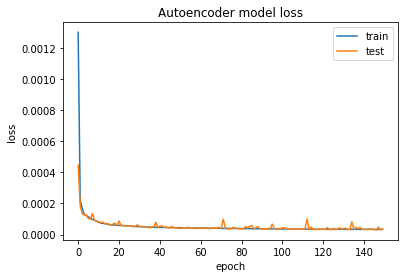

Train on 213606 samples, validate on 71201 samples
Epoch 1/50
213606/213606 [==============================] - 50s 233us/step - loss: 0.0426 - accuracy: 0.9878 - val_loss: 0.0048 - val_accuracy: 0.9993
Epoch 2/50
213606/213606 [==============================] - 48s 222us/step - loss: 0.0079 - accuracy: 0.9987 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 3/50
213606/213606 [==============================] - 48s 224us/step - loss: 0.0063 - accuracy: 0.9989 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 4/50
213606/213606 [==============================] - 48s 225us/step - loss: 0.0061 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9994
Epoch 5/50
213606/213606 [==============================] - 48s 226us/step - loss: 0.0052 - accuracy: 0.9991 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 6/50
213606/213606 [==============================] - 48s 224us/step - loss: 0.0054 - accuracy: 0.9990 - val_loss: 0.0041 - val_accuracy: 0.9994
Epoch 7/50
213606/213606 [=================

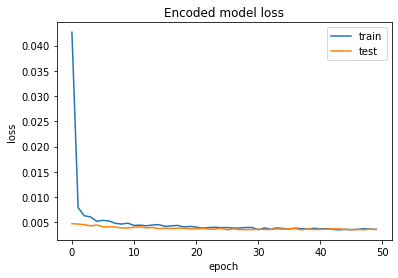

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993820311512479


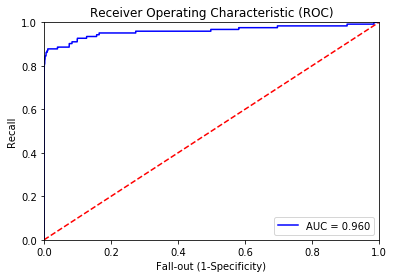

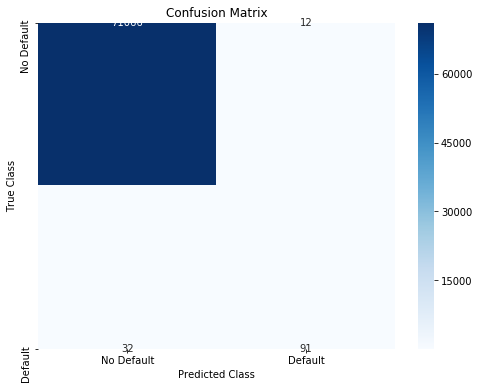

AUC(ROC): 0.8698342848815809
Precision: 0.883495145631068
Recall: 0.7398373983739838
F1 score: 0.8053097345132745
False positives: 12
True positives: 91
False negatives: 32
True negatives: 71066


In [6]:
nb_epoch = 20
#batch_size = 256
input_dim = X.shape[1] #num of columns, 30
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
hidden_dim = 15
learning_rate = 1e-7


#Cross_Validate

kf = StratifiedKFold(4, shuffle = True, random_state=42) # Use for Kfold Validation


tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = ADASYN(random_state=2)
    X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    input_layer = Input(shape=(input_dim, ))

    encoder = Dense(encoding_dim_1, activation="elu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = Dense(encoding_dim_2, activation = "elu")(encoder)
    encoder = Dense(encoding_dim_3, activation = "elu")(encoder)

    encoder = Dense(hidden_dim, activation="elu")(encoder)

    decoder = Dense(encoding_dim_3, activation = "elu")(encoder)
    decoder = Dense(encoding_dim_2, activation = "elu")(decoder)
    decoder = Dense(encoding_dim_1, activation = "elu")(decoder)
    decoder = Dense(input_dim, activation="elu")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    # Create the autoencoder model
    autoencoder = Model(input_layer, decoder)
    #Compile the autoencoder model
    autoencoder.compile(optimizer='adam',loss='mean_squared_error')
    #Fit to train set and save to hist_auto for plotting purposes
    hist_auto = autoencoder.fit(x_train, x_train,epochs=150,shuffle=True,validation_data=(x_test, x_test))
    
    
    # Summarize history for loss
    plt.figure()
    plt.plot(hist_auto.history['loss'])
    plt.plot(hist_auto.history['val_loss'])
    plt.title('Autoencoder model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, encoder)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(x_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape

    epochs = 50
    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train,epochs=epochs,validation_data=(encoded_test_x, y_test), verbose=1)
    
    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    
    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)



In [7]:
print(" Average tn = " + str(Average(tn_summary)))
print(" Average fp = " + str(Average(fp_summary)))
print(" Average fn = "+ str(Average(fn_summary)))    
print(" Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print(" Average Precision = " + str(Average_precision))

print(" Average Recall = " + str(Average_recall))

print(" Average F1 score = " + str(Average_f1_score))

 Average tn = 71064.0
 Average fp = 14.75
 Average fn = 29.25
 Average tp = 93.75
 Average Precision = 0.8640552995391705
 Average Recall = 0.7621951219512195
 Average F1 score = 0.8099352051835854


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print(" Total fp: " + str(total_fp))
print(" Total fn: " + str(total_fn))
print(" Total tp: " + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print(" Total Precision = " + str(Total_Precision))
print(" Total Recall = " + str(Total_Recall))
print(" Total F1_score = " + str(Total_F1_score))

 Total tn: 284256
 Total fp: 59
 Total fn: 117
 Total tp: 375
 Total Precision = 0.8640552995391705
 Total Recall = 0.7621951219512195
 Total F1_score = 0.8099352051835854


In [9]:

print("--- %s seconds ---" % (time.time() - start_time))

Total_time = (time.time()-start_time)

print(Total_time)

--- 21517.84676551819 seconds ---
21517.84676551819


In [10]:
Total_time_hours = Total_time/3600

print(Total_time_hours)

5.977179657088386
